#Machine Learning Project 2
###Giana Grace and Natalie Dume

#INTRO

Research is being done everyday in a variety of fields and subjects. Conducting research already is a tedious and tasking process but are there ways to simplify the process? Say for example, you are a researcher preparing a literatire review for a thesis requiring you to analyze a large volume of articles quickly. How will you categorize relevant studies and see how frequently each topic is addressed?
This dataset offers an in-depth view of research articles across various fields, providing critical information such as article titles, abstracts, and unique identifiers. The abstracts summarize the primary content and focus of each study, allowing for efficient analysis of thematic trends and topic distribution. This data can be used to address the question: Can you create a system that can identify the main topics in a series of research articles and determine which of these topics appear in each article? Using techniques like Latent Dirichlet Allocation (LDA), we can identify key topics within the text data, tracking how frequently each topic emerges across different articles. LDA is especially well-suited for this task because it assumes that documents are a mixture of topics and that each topic is a mixture of words. This assumption aligns with the nature of research articles, which may address multiple subtopics but tend to focus on a primary theme.
This process can assist researchers in organizing, categorizing, and synthesizing large volumes of literature more effectively, particularly for tasks like literature reviews or meta-analyses. By analyzing the frequency of topics, we can also uncover trends in research interests, identify gaps in the literature, and observe shifts in academic focus over time. This can reveal insights into broader research trends, dominant themes, and emerging areas within specific fields. The LDA-based recommendation model aims to address common challenges in text-based datasets, such as identifying the implicit structure of large-scale textual information and enhancing topic-based retrieval of articles.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/articles.csv", nrows=1000)

articles.head(10)

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
5,20978,Pairwise Difference Estimation of High Dimensi...,This paper proposes a regularized pairwise d...
6,20979,Dissecting the multivariate extremal index and...,A central issue in the theory of extreme val...
7,20980,"Big Universe, Big Data: Machine Learning and I...",Astrophysics and cosmology are rich with dat...
8,20981,Natural Language Does Not Emerge 'Naturally' i...,A number of recent works have proposed techn...
9,20982,Properties and Origin of Galaxy Velocity Bias ...,We use the hydrodynamical galaxy formation s...


#Using Latent Direchlet Allocation to Sort Articles

After loading in and inspecting the dataset, the libraries nltk (Natural Language Toolkit) and gensim are loaded in for natural language processing (NLP). NLTK is useful for text preprocessing tasks, while Gensim specializes in topic modeling and similarity retrieval. stopwords and word_tokenize are tools from NLTK to help filter common words (like "the," "is") and break down text into individual words (tokens), respectively.
We then add code to download lists 'stopwords' and 'punkt' which would help in tokenizing text and removing common words that don't contribute or have any meanings to the topics.

In [ ]:
!pip install gensim nltk

After loading in and inspecting the dataset, the libraries nltk (Natural Language Toolkit) and gensim are loaded in for natural language processing (NLP). NLTK is useful for text preprocessing tasks, while Gensim specializes in topic modeling and similarity retrieval. stopwords and word_tokenize are tools from NLTK to help filter common words (like "the," "is") and break down text into individual words (tokens), respectively.
We then add code to download lists 'stopwords' and 'punkt' which would help in tokenizing text and removing common words that don't contribute or have any meanings to the topics.
It was helpful to add a preprocess funcion which takes a single document and processes it, allowiing us to break down individual words, while removing characters such as punctuation and numbers. Additionally, this function filters out common words.
As a result, we get preprocessed_docs, which contains lists of meaningful words for each title, completely free of stopwords and punctuation.

In [ ]:
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

articles_1 = articles['TITLE']

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

processed_docs = [preprocess_text(doc) for doc in articles_1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


It was helpful to add a preprocess funcion which takes a single document and processes it, allowiing us to break down individual words, while removing characters such as punctuation and numbers. Additionally, this function filters out common words. As a result, we get preprocessed_docs, which contains lists of meaningful words for each title, completely free of stopwords and punctuation.


Next, we work on checking to see what number of topics to use, correlated with coherence score.
To do this, we use stop_words to represent a set of common English words, like "the", "is", that we want filtered out of documents.
To simplify the identification process, processed_docs, which is a list comprehension that iterates over each article, converts the articles/documents into lowercase, tokenizes the words, and only keeps the alphabetic tokens while also filtering out the stopwords. This results in a sublist of filtered, meaningful words for each article.
Now for the part of evaluating the coherence score using the function compute_coherence_values, along with parameters and a rnage of number of topics to evaluate.
This creates a LDA model for each topic number with a fixed random state for reproductibility and for 10 passes for better convergence/more efficient merging. Returned, we have the a list of LDA models and their coherence models. To visually assess this, a plot is created with coherence scores against the number of topics. Higher convergence score indicates more meaningful and consistent topics.


In [ ]:
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np

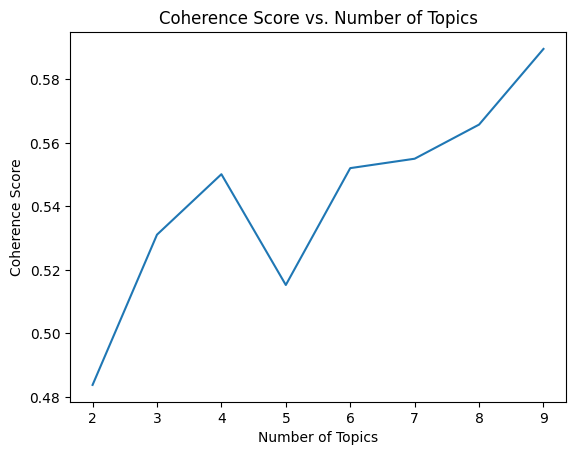

Optimal Number of Topics: 9
Topic 1: 0.010*"learning" + 0.009*"networks" + 0.009*"models" + 0.009*"deep" + 0.007*"using"
Topic 2: 0.010*"neural" + 0.008*"learning" + 0.008*"networks" + 0.007*"deep" + 0.006*"approach"
Topic 3: 0.008*"using" + 0.008*"learning" + 0.007*"framework" + 0.006*"groups" + 0.006*"models"
Topic 4: 0.007*"model" + 0.006*"data" + 0.006*"models" + 0.006*"system" + 0.006*"based"
Topic 5: 0.023*"learning" + 0.019*"networks" + 0.015*"deep" + 0.013*"neural" + 0.009*"convolutional"
Topic 6: 0.009*"theory" + 0.008*"equations" + 0.008*"nonlinear" + 0.007*"problem" + 0.006*"differential"
Topic 7: 0.009*"learning" + 0.008*"distributed" + 0.007*"systems" + 0.006*"data" + 0.005*"classification"
Topic 8: 0.008*"via" + 0.006*"group" + 0.004*"function" + 0.004*"maps" + 0.004*"estimation"
Topic 9: 0.014*"data" + 0.010*"analysis" + 0.008*"models" + 0.007*"networks" + 0.006*"efficient"


In [ ]:
stop_words = set(stopwords.words("english"))
processed_docs = [
    [word for word in word_tokenize(doc.lower()) if word.isalpha() and word not in stop_words]
    for doc in articles_1
]

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# compute coherence score for topics
def compute_coherence_values(corpus, dictionary, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Find coherence scores
start, limit, step = 2, 10, 1
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary=dictionary, texts=processed_docs, start=start, limit=limit, step=step)

# Plot coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# select model based on highest coherence score
optimal_num_topics = x[np.argmax(coherence_values)]
best_lda_model = model_list[np.argmax(coherence_values)]

# find the best number of topics
print(f"Optimal Number of Topics: {optimal_num_topics}")
for idx, topic in best_lda_model.print_topics(num_words=5):
    print(f"Topic {idx + 1}: {topic}")

The coherence score in the context of LDA is used to evaluate and measure how meaningful the words are within the topics, and whether they appear frequently together in certain contexts. Coherence is important for interpretability, especially when it comes to LDA models. A high coherence score is desired, and therefore that is why the number of topics chosen when running the LDA model is 9. As shown above, we discovered that 9 was the optimal number of topics for this dataset, as seen in the graph above.

Using number of topics, use LDA to sort research articles into specific number of topics.

In [ ]:
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [ ]:
num_topics = 9

# train LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

# print topics and words associated with each one
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx + 1}: {topic}")

Topic 1: 0.010*"learning" + 0.009*"networks" + 0.009*"models" + 0.009*"deep" + 0.007*"using"
Topic 2: 0.010*"neural" + 0.008*"learning" + 0.008*"networks" + 0.007*"deep" + 0.006*"approach"
Topic 3: 0.008*"using" + 0.008*"learning" + 0.007*"framework" + 0.006*"groups" + 0.006*"models"
Topic 4: 0.007*"model" + 0.006*"data" + 0.006*"models" + 0.006*"system" + 0.006*"based"
Topic 5: 0.023*"learning" + 0.019*"networks" + 0.015*"deep" + 0.013*"neural" + 0.009*"convolutional"
Topic 6: 0.009*"theory" + 0.008*"equations" + 0.008*"nonlinear" + 0.007*"problem" + 0.006*"differential"
Topic 7: 0.009*"learning" + 0.008*"distributed" + 0.007*"systems" + 0.006*"data" + 0.005*"classification"
Topic 8: 0.008*"via" + 0.006*"group" + 0.004*"function" + 0.004*"maps" + 0.004*"estimation"
Topic 9: 0.014*"data" + 0.010*"analysis" + 0.008*"models" + 0.007*"networks" + 0.006*"efficient"


In [ ]:
num_to_show = 5

for i, document in enumerate(articles_1[:5]):
    bow_vector = dictionary.doc2bow(preprocess_text(document))
    topics = lda_model.get_document_topics(bow_vector)
    top_topics = sorted(topics, key=lambda x: x[1], reverse=True)[:num_to_show]
    print(f"\nTopic distribution for Document {i + 1} ('{document[:50]}...'):")
    for topic, probability in top_topics:
        print(f"Topic {topic + 1}: {probability:.4f}")


Topic distribution for Document 1 ('Closed-form Marginal Likelihood in Gamma-Poisson M...'):
Topic 8: 0.8222
Topic 5: 0.0222
Topic 4: 0.0222
Topic 2: 0.0222
Topic 1: 0.0222

Topic distribution for Document 2 ('Laboratory mid-IR spectra of equilibrated and igne...'):
Topic 4: 0.9111
Topic 5: 0.0111
Topic 2: 0.0111
Topic 8: 0.0111
Topic 6: 0.0111

Topic distribution for Document 3 ('Case For Static AMSDU Aggregation in WLANs...'):
Topic 9: 0.8518
Topic 8: 0.0185
Topic 3: 0.0185
Topic 2: 0.0185
Topic 5: 0.0185

Topic distribution for Document 4 ('The $Gaia$-ESO Survey: the inner disk intermediate...'):
Topic 9: 0.8889
Topic 6: 0.0139
Topic 1: 0.0139
Topic 2: 0.0139
Topic 8: 0.0139

Topic distribution for Document 5 ('Witness-Functions versus Interpretation-Functions ...'):
Topic 9: 0.8518
Topic 4: 0.0185
Topic 1: 0.0185
Topic 2: 0.0185
Topic 3: 0.0185


For LDA model, we converted each article document into bag-of-words (BoW) format, making the documents represented as tuples. This way, each tuple contains a word ID and the frequency of that word in the document. BoW also serves as input for training the LDA model.
LDA model is initializes using Gensim package. Word IDs are mapped to words to make interpretating topics easier, then ensuring the results are productive after number of topics is specified. To improve convergence, the model will pass through 10 times.
Below, we see the topics and the top 5 words that characterize each topic with their weights, which indicate relevance. By training the LDA model to generate topics and display top wordds for each, it allows for easier interpretation og each topic's main theme.


Now were going to show:
* The specific topics
* The titles of the research articles that fit into these topics
* The frequency at which these topics appear


This is where we find the article titles, which topic they fall under, and number of times topic appears. We proceed with the process by counting the occurrences of each topic assignment across all documents. In the code below, the topics are sorted by the probability in descending order, placing the most probable topic at the beginning of the list. This allows for the most probable topic for each document.

In [ ]:
from collections import Counter

topic_counts = Counter()

num_to_show = 5

print("\nDocument Titles and Their Assigned Topics (first 5 topics as an example):")
for i, row in enumerate(lda_model[corpus]):
    # sort topics by probability
    row = sorted(row, key=lambda x: x[1], reverse=True)
    # find topic probability for articles
    dominant_topic = row[0][0]  # No need to add 1 here; keep topic as zero-indexed
    topic_counts[dominant_topic] += 1
    print(f"Document {i + 1}: '{articles_1[i][:50]}...', Assigned Topic: {dominant_topic + 1}")
    if i >= num_to_show:  # stop after first 5 documents to save space (there are approx. 1000 articles total)
        break



for i, row in enumerate(lda_model[corpus]):
    # sort topics by probability
    row = sorted(row, key=lambda x: x[1], reverse=True)

    dominant_topic = row[0][0]
    topic_counts[dominant_topic] += 1

print("\nNumber of Documents Assigned to Each Topic:")
for topic_num, count in topic_counts.items():
    print(f"Topic {topic_num + 1}: {count} documents")


Document Titles and Their Assigned Topics (first 5 topics as an example):
Document 1: 'Closed-form Marginal Likelihood in Gamma-Poisson M...', Assigned Topic: 8
Document 2: 'Laboratory mid-IR spectra of equilibrated and igne...', Assigned Topic: 4
Document 3: 'Case For Static AMSDU Aggregation in WLANs...', Assigned Topic: 9
Document 4: 'The $Gaia$-ESO Survey: the inner disk intermediate...', Assigned Topic: 9
Document 5: 'Witness-Functions versus Interpretation-Functions ...', Assigned Topic: 9
Document 6: 'Pairwise Difference Estimation of High Dimensional...', Assigned Topic: 8

Number of Documents Assigned to Each Topic:
Topic 8: 98 documents
Topic 4: 100 documents
Topic 9: 120 documents
Topic 6: 104 documents
Topic 7: 106 documents
Topic 1: 139 documents
Topic 2: 98 documents
Topic 5: 142 documents
Topic 3: 99 documents


Lastly, we explore how to display the words associated with each topic, which is really how the research articles are sorted. We retrieve the top num_words words for each topic, which is represented by a tuple. After some looping through the topics, we get an output of each topic number, that has been adjusted to one-based indexing, and its top words.

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

topic_assignments = []

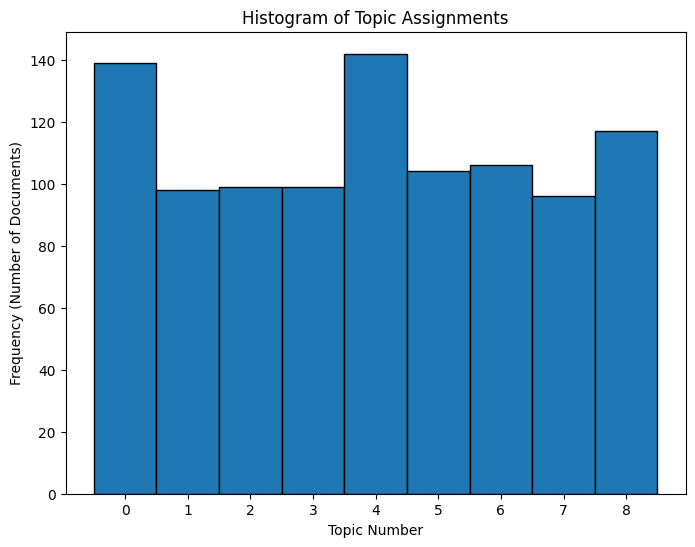

In [ ]:
for i, row in enumerate(lda_model[corpus]):
    row = sorted(row, key=lambda x: x[1], reverse=True)

    dominant_topic = row[0][0]
    topic_assignments.append(dominant_topic)

# plotting the histogram of the topic number
plt.figure(figsize=(8, 6))
plt.hist(topic_assignments, bins=range(min(topic_assignments), max(topic_assignments) + 2), edgecolor='black', align='left')
plt.xlabel('Topic Number')
plt.ylabel('Frequency (Number of Documents)')
plt.title('Histogram of Topic Assignments')
plt.xticks(range(min(topic_assignments), max(topic_assignments) + 1))
plt.show()

As we can see above, the topics that are most frequently seen in the dataset of research articles are topics 1, 5, and 9 (the range starting at 0 is 1, and ending at 8 is 9).

Words associated with each topic (how the research articles are sorted)

In [ ]:
num_words = 7  # set how many specific top words you want for each topic
print("Words Associated with Each Topic:")
for idx, topic in lda_model.print_topics(num_words=num_words):
    print(f"Topic {idx + 1}: {topic}")

Words Associated with Each Topic:
Topic 1: 0.010*"learning" + 0.009*"networks" + 0.009*"models" + 0.009*"deep" + 0.007*"using" + 0.006*"linear" + 0.006*"robust"
Topic 2: 0.010*"neural" + 0.008*"learning" + 0.008*"networks" + 0.007*"deep" + 0.006*"approach" + 0.006*"network" + 0.006*"stochastic"
Topic 3: 0.008*"using" + 0.008*"learning" + 0.007*"framework" + 0.006*"groups" + 0.006*"models" + 0.005*"time" + 0.005*"image"
Topic 4: 0.007*"model" + 0.006*"data" + 0.006*"models" + 0.006*"system" + 0.006*"based" + 0.006*"learning" + 0.005*"quantum"
Topic 5: 0.023*"learning" + 0.019*"networks" + 0.015*"deep" + 0.013*"neural" + 0.009*"convolutional" + 0.007*"using" + 0.005*"dynamics"
Topic 6: 0.009*"theory" + 0.008*"equations" + 0.008*"nonlinear" + 0.007*"problem" + 0.006*"differential" + 0.005*"random" + 0.005*"stochastic"
Topic 7: 0.009*"learning" + 0.008*"distributed" + 0.007*"systems" + 0.006*"data" + 0.005*"classification" + 0.005*"analysis" + 0.005*"structure"
Topic 8: 0.008*"via" + 0.006

# PRINTING RESEARCH ARTICLE AND ITS TOPIC

In [ ]:
print("Only printed first 5 as example to save space:")
print("")
for i, row in enumerate(lda_model[corpus]):
    # sort topics for each document by highest probability first
    row = sorted(row, key=lambda x: x[1], reverse=True)
    # get the most likely topic for each document
    dominant_topic = row[0][0]
    if i >= num_to_show:  # stop after first 5 documents
        break

    # print the main topic and associated words
    print(f"Document {i + 1}: '{articles_1[i][:50]}...'")
    print(f"Main Topic: {dominant_topic + 1}")
    print("Top Words for this Topic:")
    print(lda_model.print_topic(dominant_topic, topn=5))
    print("="*50)

Only printed first 5 as example to save space:

Document 1: 'Closed-form Marginal Likelihood in Gamma-Poisson M...'
Main Topic: 8
Top Words for this Topic:
0.008*"via" + 0.006*"group" + 0.004*"function" + 0.004*"maps" + 0.004*"estimation"
Document 2: 'Laboratory mid-IR spectra of equilibrated and igne...'
Main Topic: 4
Top Words for this Topic:
0.007*"model" + 0.006*"data" + 0.006*"models" + 0.006*"system" + 0.006*"based"
Document 3: 'Case For Static AMSDU Aggregation in WLANs...'
Main Topic: 9
Top Words for this Topic:
0.014*"data" + 0.010*"analysis" + 0.008*"models" + 0.007*"networks" + 0.006*"efficient"
Document 4: 'The $Gaia$-ESO Survey: the inner disk intermediate...'
Main Topic: 9
Top Words for this Topic:
0.014*"data" + 0.010*"analysis" + 0.008*"models" + 0.007*"networks" + 0.006*"efficient"
Document 5: 'Witness-Functions versus Interpretation-Functions ...'
Main Topic: 9
Top Words for this Topic:
0.014*"data" + 0.010*"analysis" + 0.008*"models" + 0.007*"networks" + 0.006*"effic

# Conclusion

Using a combination of Natural Language Processing (NLP) and machine learning techniques, specifically Latent Dirichlet Allocation (LDA), we achieve a method for efficiently categorizing large volumes of academic content based on thematic trends. This allowed for us to successfully develops a system that identifies the main topics within a collection of research articles and determines the presence and prevalence of these topics across each article.
By preprocessing the textual data, where each article's content undergoes tokenization, stopword removal, and lowercasing to standardize and prepare the text for analysis. After preprocessing, we use LDA, a widely respected topic modeling algorithm, to analyze and extract dominant topics across the dataset. The LDA model learns latent topics in the corpus by assigning words to topics based on co-occurrence patterns, allowing it to uncover structured themes without requiring labeled data.
To optimize the model, we calculated coherence scores, which measure the interpretability of topics, for a range of potential topic numbers. This helps in determining the ideal number of topics, ensuring that the model captures meaningful patterns within the data. The trained LDA model then associates each article with its most relevant topic based on probability, and we analyze topic distributions by assigning each document to its most likely topic and counting the occurrences.
For interpretability, we examine the top words in each topic, which provide a snapshot of each topic’s thematic content. The system outputs both the assigned topics for individual articles and the frequency of each topic across the entire corpus, answering the research question by enabling a clear view of which topics are present and how frequently they appear.
The system is highly valuable for researchers who need to organize and synthesize a large collection of academic literature. By automating the process of identifying main topics, the model reduces the time and effort involved in manual categorization. Additionally, it aids in prioritizing articles for further reading based on topic relevance, helping researchers to streamline their workflow.
This system directly addresses the client’s question by providing an automated way to identify and categorize the main topics within a series of research articles. Each article is assigned to its most relevant topic, and the frequency of topics is measured across the corpus. This not only categorizes articles by theme but also offers insight into the prevalence of each topic, providing a comprehensive view of the thematic structure of the research dataset. The system answers the question of how to identify and track key topics in a large body of research, allowing for a more efficient and insightful literature analysis process.